In [1]:
!pip install pandas matplotlib seaborn


In [2]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset (upload the csv first in Colab or mount Kaggle)
df = pd.read_csv("Unemployment in India.csv")

# View first few rows
print(df.head())
print(df.info())


           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data colu

In [3]:
# Check missing values
print(df.isnull().sum())


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [4]:
# Summary statistics
print(df.describe())

       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max                                  72.570000  


In [5]:
# Columns in dataset
print(df.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [6]:
# Rename columns for clarity (if messy)
df = df.rename(columns={"Region":"State", " Date":"Date", "Frequency ":"Frequency",
                        " Estimated Unemployment Rate (%)":"UnemploymentRate",
                        " Estimated Employed":"Employed",
                        " Estimated Labour Participation Rate (%)":"LabourParticipation"})

/tmp/ipython-input-2355921077.py:3: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


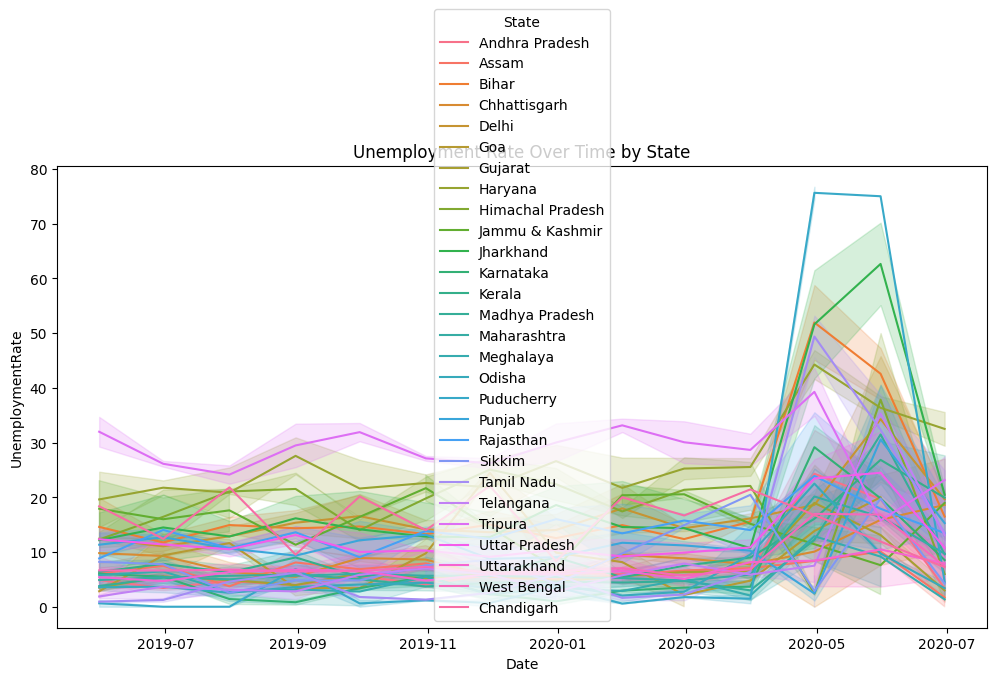

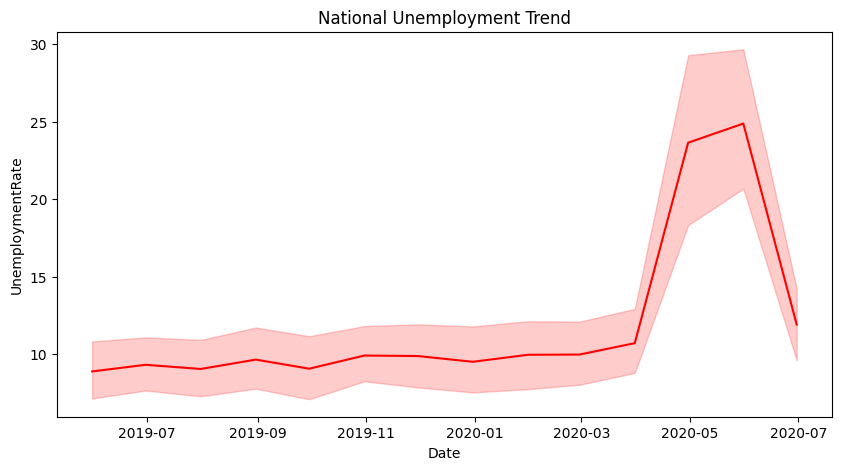

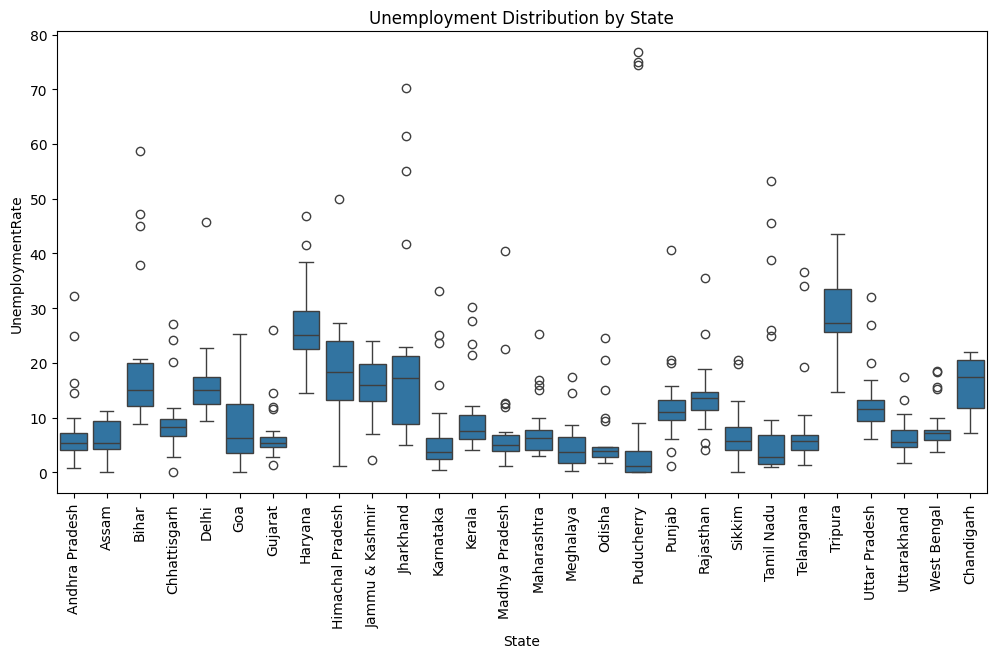

In [7]:
#Data Visulization
# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

# Unemployment trend over time
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='UnemploymentRate', data=df, hue='State')
plt.title("Unemployment Rate Over Time by State")
plt.show()

# Overall India trend
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='UnemploymentRate', data=df, color="red")
plt.title("National Unemployment Trend")
plt.show()

# Boxplot by region
plt.figure(figsize=(12,6))
sns.boxplot(x='State', y='UnemploymentRate', data=df)
plt.xticks(rotation=90)
plt.title("Unemployment Distribution by State")
plt.show()


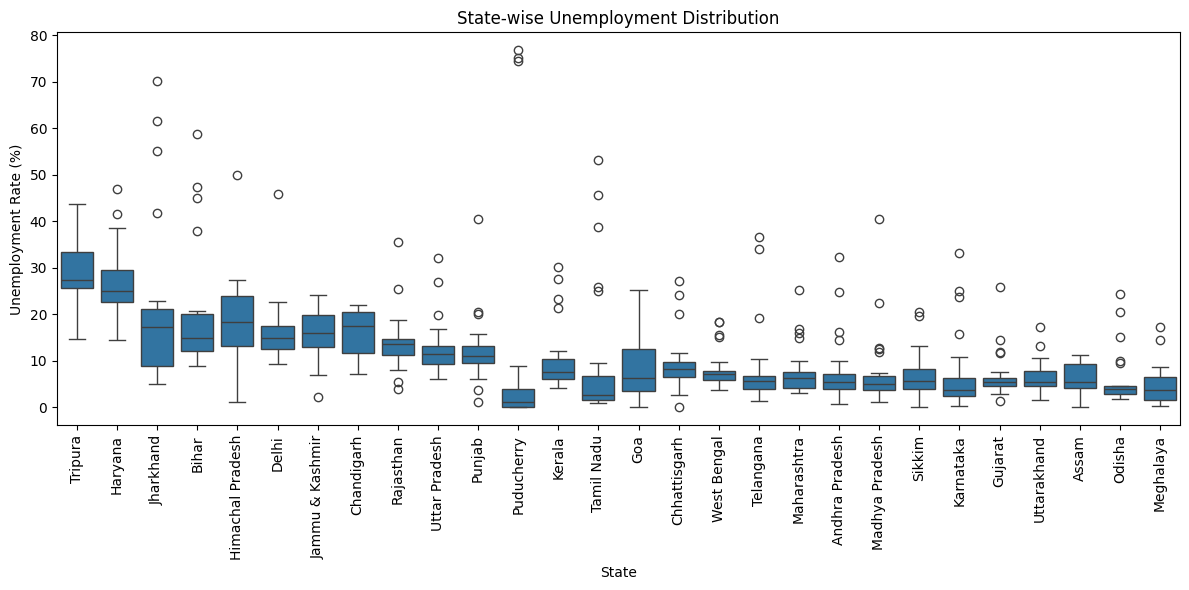

Top 5 states (avg unemployment):
 State
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Name: UnemploymentRate, dtype: float64 

Bottom 5 states (avg unemployment):
 State
Gujarat        6.663929
Uttarakhand    6.582963
Assam          6.428077
Odisha         5.657857
Meghalaya      4.798889
Name: UnemploymentRate, dtype: float64


In [15]:
#4) state-wise distribution & rankings
if {"State","UnemploymentRate"} <= set(df.columns):
    plt.figure(figsize=(12,6))
    order = df.groupby("State")["UnemploymentRate"].mean().sort_values(ascending=False).index
    sns.boxplot(data=df, x="State", y="UnemploymentRate", order=order)
    plt.xticks(rotation=90)
    plt.title("State-wise Unemployment Distribution")
    plt.ylabel("Unemployment Rate (%)")
    plt.xlabel("State")
    plt.tight_layout()
    plt.show()

    state_avg = df.groupby("State")["UnemploymentRate"].mean().sort_values(ascending=False)
    print("Top 5 states (avg unemployment):\n", state_avg.head(5), "\n")
    print("Bottom 5 states (avg unemployment):\n", state_avg.tail(5))


In [8]:
#Covid-19 Impact
# Split dataset before and after March 2020
pre_covid = df[df['Date'] < '2020-03-01']
post_covid = df[df['Date'] >= '2020-03-01']

print("Average Unemployment Before Covid:", pre_covid['UnemploymentRate'].mean())
print("Average Unemployment After Covid:", post_covid['UnemploymentRate'].mean())


Average Unemployment Before Covid: 9.509533582089553
Average Unemployment After Covid: 17.774362745098042


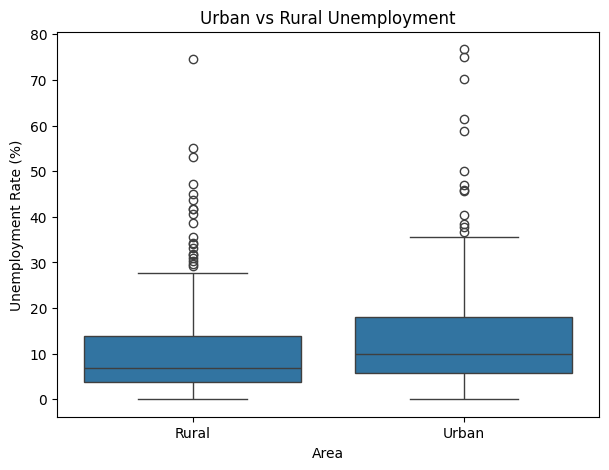

In [10]:
#urban vs rural
if {"Area","UnemploymentRate"} <= set(df.columns):
    plt.figure(figsize=(7,5))
    sns.boxplot(data=df, x="Area", y="UnemploymentRate")
    plt.title("Urban vs Rural Unemployment")
    plt.ylabel("Unemployment Rate (%)")
    plt.xlabel("Area")
    plt.show()


Average Unemployment BEFORE Covid (pre-Mar 2020): 9.51%
Average Unemployment AFTER  Covid (Mar 2020+): 17.77%


/tmp/ipython-input-316740806.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index("Date").resample("M")["UnemploymentRate"].mean().dropna()


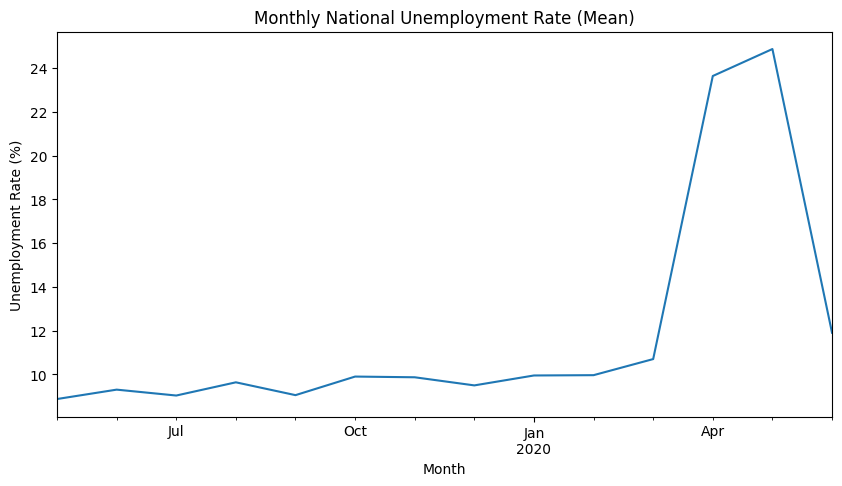

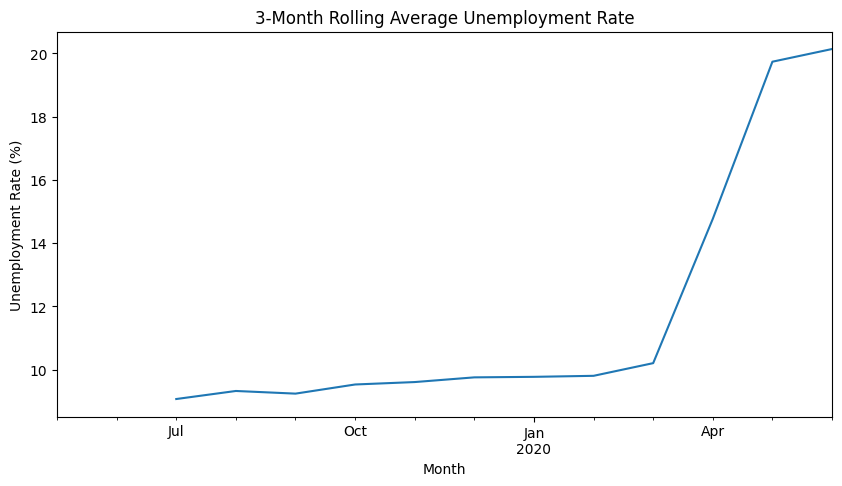

In [16]:
#covid-19 impact (pre vs post March 2020)if "Date" in df.columns and "UnemploymentRate" in df.columns:
# covid-19 impact (pre vs post March 2020)
if "Date" in df.columns and "UnemploymentRate" in df.columns:
    pre = df[df["Date"] < "2020-03-01"]["UnemploymentRate"].mean()
    post = df[df["Date"] >= "2020-03-01"]["UnemploymentRate"].mean()
    print(f"Average Unemployment BEFORE Covid (pre-Mar 2020): {pre:.2f}%")
    print(f"Average Unemployment AFTER  Covid (Mar 2020+): {post:.2f}%")

    # monthly national average line
    monthly = df.set_index("Date").resample("M")["UnemploymentRate"].mean().dropna()
    plt.figure(figsize=(10,5))
    monthly.plot()
    plt.title("Monthly National Unemployment Rate (Mean)")
    plt.ylabel("Unemployment Rate (%)")
    plt.xlabel("Month")
    plt.show()

    # 3-month rolling average
    roll3 = monthly.rolling(3).mean()
    plt.figure(figsize=(10,5))
    roll3.plot()
    plt.title("3-Month Rolling Average Unemployment Rate")
    plt.ylabel("Unemployment Rate (%)")
    plt.xlabel("Month")
    plt.show()


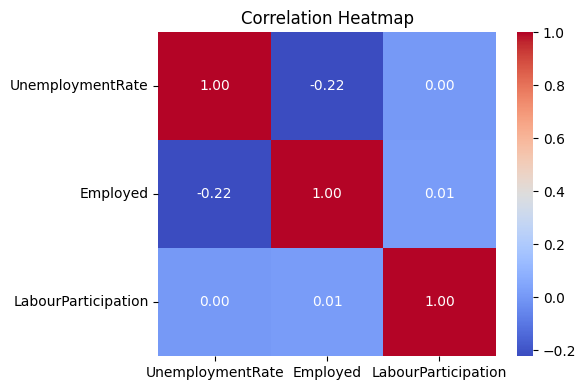

In [13]:
#correlations
cols = [c for c in ["UnemploymentRate","Employed","LabourParticipation"] if c in df.columns]
if len(cols) >= 2:
    plt.figure(figsize=(6,4))
    sns.heatmap(df[cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()
